
#Training Neural Networks for Image Classification
##CIFAR 10









# Using VGG-16 network as a Feature Extractor
After trying different architectures I was still not able to get a good accuracy (> 70%)  therefore, I started testing with different image preprocessing techniques. Since, the VGG16 input image is larger in size, 224 × 224 RGB image to be precise (Simonyan,2015), I decided to upscale my input image too. The upscaled image coupled with standardization resulted in a much improved accuracy of  **74.8%**.

In [0]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
import numpy as np
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import cv2

Using TensorFlow backend.


Loading and Describing Data



In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()   #loading the data


In [0]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)  #shapes of test and train


(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [0]:
categorical_y_train = to_categorical(y_train)
len(categorical_y_train[0])   # number of classes

10

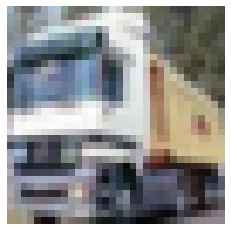

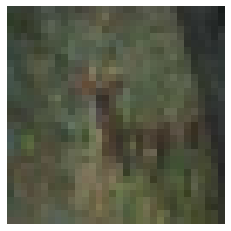

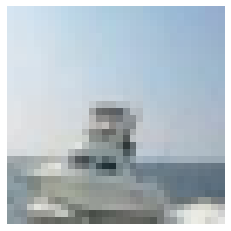

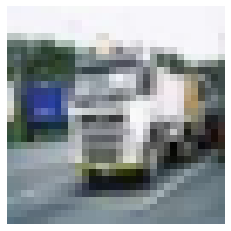

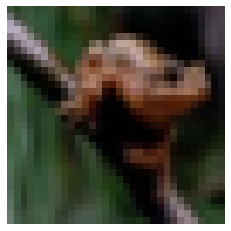

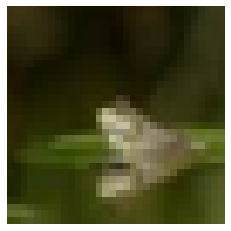

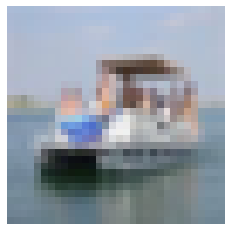

In [0]:
plt.imshow(X_train[1],interpolation="none")
plt.axis('off')
plt.show()
plt.imshow(X_train[10])
plt.axis('off')
plt.show()
plt.imshow(X_train[100])
plt.axis('off')
plt.show()
plt.imshow(X_train[1000])
plt.axis('off')
plt.show()
plt.imshow(X_train[5000])
plt.axis('off')
plt.show()
plt.imshow(X_train[25000])
plt.axis('off')
plt.show()
plt.imshow(X_train[49000])
plt.axis('off')
plt.show()


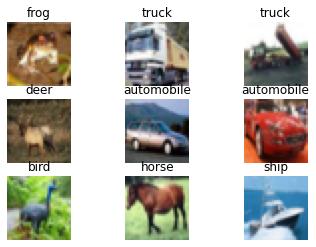

In [0]:
data_labels = ["airplane","automobile","bird"	,"cat", "deer","dog","frog","horse","ship","truck"]  #source : https://www.cs.toronto.edu/~kriz/cifar.html

for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i])
    plt.axis("off")
    plt.title(data_labels[np.where(y_train[i] == 1)[0][0]])

plt.show()


In [0]:
import cv2
def resize_dataset(matrix,size):
  """
  matrix : image dataset which is to be resized.

  size: the size to which matrix have to be resized.
  """
  resized_matrix = []
  for i in matrix:
    resized_matrix.append(cv2.resize(i, dsize=(size), interpolation=cv2.INTER_CUBIC))
  return np.asarray(resized_matrix)


In [0]:
from keras.utils import to_categorical
# Converting y_train and y_test to binary class matrix.

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


Resizing the data

In [0]:
X_train_resize =resize_dataset(X_train,(64,64))
X_test_resize =resize_dataset(X_test,(64,64))
print(X_train_resize.shape,X_test_resize.shape)


(50000, 64, 64, 3) (10000, 64, 64, 3)


In [0]:
X_train_resize_normalize= (X_train_resize - np.mean(X_train_resize))/np.std(X_train_resize)
X_test_resize_normalize = (X_test_resize - np.mean(X_test_resize))/np.std(X_test_resize)

In [0]:
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Activation, Dropout
from keras.applications.vgg16 import VGG16
from keras.optimizers import Adam

input_shape = X_train_resize_normalize[0].shape

vgg_model =  VGG16(weights='imagenet', include_top=False, input_shape= input_shape)

for layer in vgg_model.layers:
  layer.trainable = False

model = Sequential()
model.add(vgg_model)

model.add(Flatten())

model.add(Dense(1024,input_shape = input_shape, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(100,  activation="relu"))
model.add(Dense(len(y_train[0])))
model.add(Activation("softmax"))

Adam = Adam(lr = 0.00001)
model.compile(optimizer = Adam, loss = 'categorical_crossentropy', metrics = ['acc'])
hist = model.fit(X_train_resize_normalize, y_train, epochs = 8, batch_size = 64, validation_data = (X_test_resize_normalize,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/8
50000/50000 [==============================] - 39s 787us/step - loss: 1.8396 - acc: 0.3839 - val_loss: 1.2583 - val_acc: 0.6053
Epoch 2/8
50000/50000 [==============================] - 39s 784us/step - loss: 1.2076 - acc: 0.5943 - val_loss: 0.9763 - val_acc: 0.6686
Epoch 3/8
50000/50000 [==============================] - 39s 787us/step - loss: 1.0230 - acc: 0.6526 - val_loss: 0.8751 - val_acc: 0.6987
Epoch 4/8
50000/50000 [==============================] - 39s 789us/step - loss: 0.9295 - acc: 0.6821 - val_loss: 0.8220 - val_acc: 0.7159
Epoch 5/8
50000/50000 [==============================] - 39s 787us/step - loss: 0.8696 - acc: 0.7018 - val_loss: 0.7828 - val_acc: 0.7275
Epoch 6/8
50000/50000 [==============================] - 40s 793us/step - loss: 0.8242 - acc: 0.7149 - val_loss: 0.7581 - val_acc: 0.7364
Epoch 7/8
50000/50000 [==============================] - 40s 791us/step - loss: 0.7943 - acc: 0.7262 - val_loss: 0.7388 - 

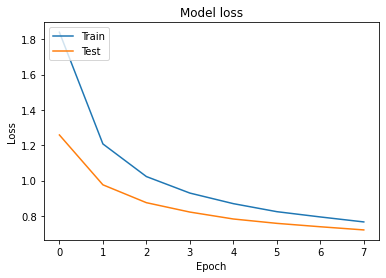

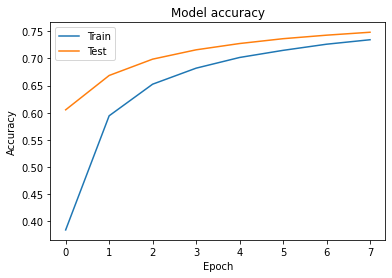

In [0]:
#Plot both the training loss as well as the validation loss on the same plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Plot both the training accuracy as well as the validation accuracy on the same plot
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()